In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/Customer.csv')
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend
0,1,Female,19,15,39,60,5,400
1,2,Female,21,15,81,40,7,900
2,3,Male,20,16,6,85,3,120
3,4,Female,23,16,77,32,6,850
4,5,Female,31,17,40,70,4,450


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     70 non-null     int64 
 1   Gender         70 non-null     object
 2   Age            70 non-null     int64 
 3   AnnualIncome   70 non-null     int64 
 4   SpendingScore  70 non-null     int64 
 5   Recency        70 non-null     int64 
 6   Frequency      70 non-null     int64 
 7   TotalSpend     70 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 4.5+ KB


In [20]:
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().map({'male': 0, 'female': 1})

In [21]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0
Recency,0
Frequency,0
TotalSpend,0


In [22]:
X = df[['Age','AnnualIncome','SpendingScore','Recency','Frequency','TotalSpend']]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


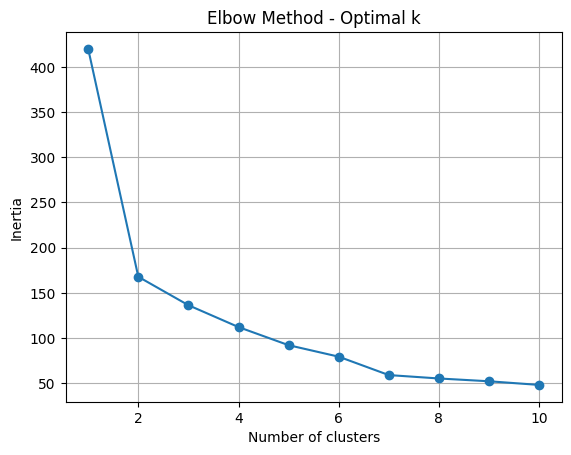

In [25]:
from sklearn.cluster import KMeans

inertia = []

# Test cluster sizes from 1 to 10
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [26]:
k = 2   # change this based on your elbow plot if needed

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [27]:
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend,Cluster
0,1,1,19,15,39,60,5,400,1
1,2,1,21,15,81,40,7,900,1
2,3,0,20,16,6,85,3,120,0
3,4,1,23,16,77,32,6,850,1
4,5,1,31,17,40,70,4,450,0


In [28]:
df['Cluster'].value_counts()


,count
Cluster,
1,35
0,35


In [29]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_centers


,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend
0,0.6407,0.059719,-0.902889,0.891467,-0.886779,-0.8904
1,-0.6407,-0.059719,0.902889,-0.891467,0.886779,0.8904


In [30]:
df['Cluster'].value_counts().sort_index()


,count
Cluster,
0,35
1,35


In [31]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  # for nicer plots, optional


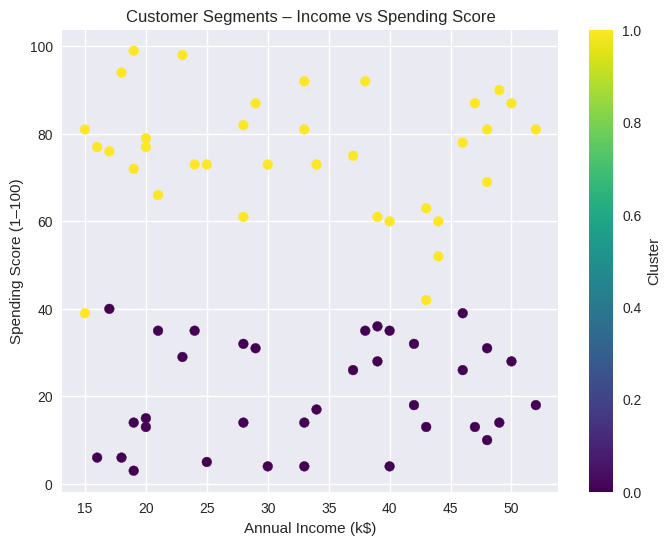

In [32]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['AnnualIncome'],
    df['SpendingScore'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segments – Income vs Spending Score")
plt.colorbar(scatter, label='Cluster')
plt.show()


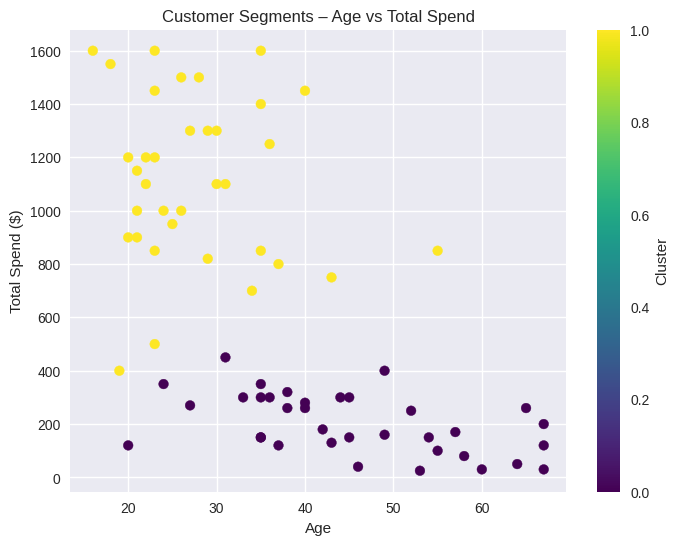

In [33]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Age'],
    df['TotalSpend'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel("Age")
plt.ylabel("Total Spend ($)")
plt.title("Customer Segments – Age vs Total Spend")
plt.colorbar(scatter, label='Cluster')
plt.show()


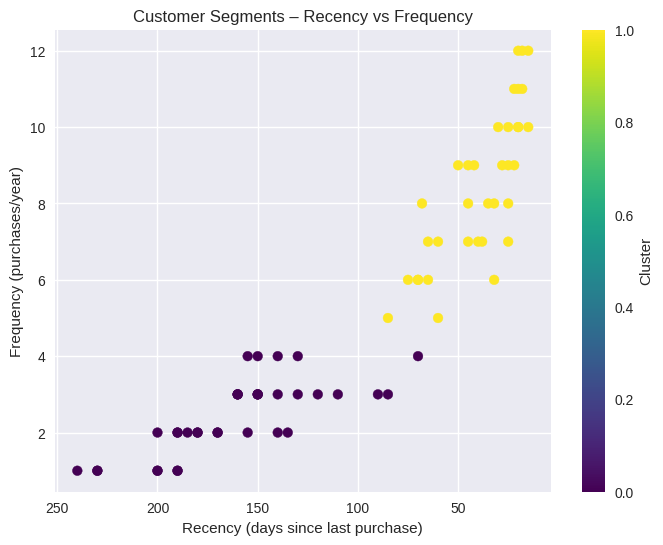

In [34]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Recency'],
    df['Frequency'],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (purchases/year)")
plt.title("Customer Segments – Recency vs Frequency")
plt.gca().invert_xaxis()  # so 'more recent' is visually to the right
plt.colorbar(scatter, label='Cluster')
plt.show()


In [35]:
cluster_profile = df.groupby('Cluster')[['Age','AnnualIncome','SpendingScore','Recency','Frequency','TotalSpend']].mean().round(1)
cluster_profile


,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend
Cluster,,,,,,
0,45.3,33.8,20.7,160.7,2.4,203.0
1,27.7,32.4,75.2,39.1,8.4,1117.7


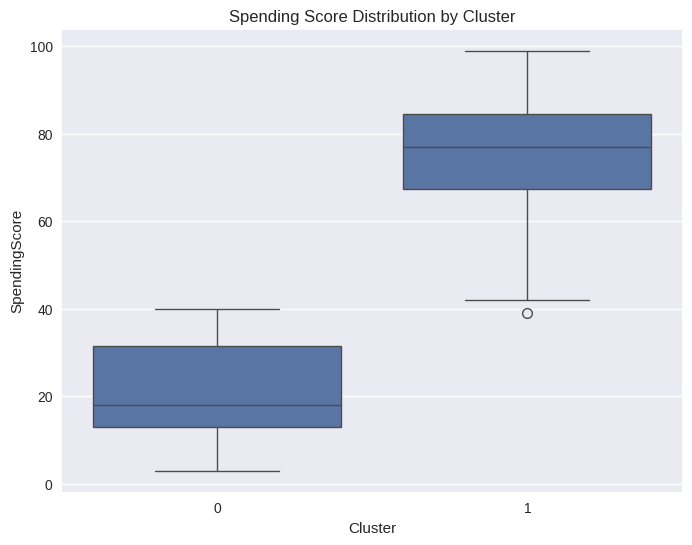

In [36]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Cluster', y='SpendingScore')
plt.title("Spending Score Distribution by Cluster")
plt.show()


In [37]:
cluster_profile = df.groupby('Cluster')[['Age','AnnualIncome','SpendingScore','Recency','Frequency','TotalSpend']].mean().round(1)
cluster_profile


,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend
Cluster,,,,,,
0,45.3,33.8,20.7,160.7,2.4,203.0
1,27.7,32.4,75.2,39.1,8.4,1117.7


In [38]:
segment_names = {
    0: "Low-Value / At-Risk Customers",
    1: "High-Value Loyal Customers"
}

df['Segment'] = df['Cluster'].map(segment_names)
df.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Recency,Frequency,TotalSpend,Cluster,Segment
0,1,1,19,15,39,60,5,400,1,High-Value Loyal Customers
1,2,1,21,15,81,40,7,900,1,High-Value Loyal Customers
2,3,0,20,16,6,85,3,120,0,Low-Value / At-Risk Customers
3,4,1,23,16,77,32,6,850,1,High-Value Loyal Customers
4,5,1,31,17,40,70,4,450,0,Low-Value / At-Risk Customers


In [39]:
df.to_csv('/content/customers_segmented.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')